<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Dataset-Titanic" data-toc-modified-id="Import-Dataset-Titanic-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Dataset Titanic</a></span><ul class="toc-item"><li><span><a href="#Join-datasets" data-toc-modified-id="Join-datasets-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Join datasets</a></span></li></ul></li><li><span><a href="#Analise-exploratoria-do-Dataset" data-toc-modified-id="Analise-exploratoria-do-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analise exploratoria do Dataset</a></span><ul class="toc-item"><li><span><a href="#Title" data-toc-modified-id="Title-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Title</a></span></li><li><span><a href="#Acompanhado" data-toc-modified-id="Acompanhado-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Acompanhado</a></span></li><li><span><a href="#Embarked" data-toc-modified-id="Embarked-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Embarked</a></span></li><li><span><a href="#Input-Age" data-toc-modified-id="Input-Age-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Input Age</a></span></li><li><span><a href="#Input-Fare" data-toc-modified-id="Input-Fare-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Input Fare</a></span></li><li><span><a href="#Input-Cabin" data-toc-modified-id="Input-Cabin-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Input Cabin</a></span></li></ul></li><li><span><a href="#Continuando-analise-exploratória" data-toc-modified-id="Continuando-analise-exploratória-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Continuando analise exploratória</a></span></li><li><span><a href="#Feature-Engineer" data-toc-modified-id="Feature-Engineer-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Engineer</a></span><ul class="toc-item"><li><span><a href="#Sibsp" data-toc-modified-id="Sibsp-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Sibsp</a></span></li><li><span><a href="#Parch" data-toc-modified-id="Parch-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Parch</a></span></li><li><span><a href="#Nomrmalização-Age-e-Fare-Min/Max" data-toc-modified-id="Nomrmalização-Age-e-Fare-Min/Max-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Nomrmalização Age e Fare Min/Max</a></span></li><li><span><a href="#Ft_Prioridade" data-toc-modified-id="Ft_Prioridade-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Ft_Prioridade</a></span></li></ul></li><li><span><a href="#Label-Enconding" data-toc-modified-id="Label-Enconding-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Label Enconding</a></span><ul class="toc-item"><li><span><a href="#Binarização" data-toc-modified-id="Binarização-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Binarização</a></span></li></ul></li><li><span><a href="#Construindo-Modelo" data-toc-modified-id="Construindo-Modelo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Construindo Modelo</a></span></li><li><span><a href="#Feature-Selection-Baseado-em-Algoritmos-de-Árvore" data-toc-modified-id="Feature-Selection-Baseado-em-Algoritmos-de-Árvore-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Feature Selection Baseado em Algoritmos de Árvore</a></span></li><li><span><a href="#Predict" data-toc-modified-id="Predict-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Predict</a></span></li></ul></div>

In [740]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

#IMAGENS.
from IPython.display import Image as img

#OUTROS.
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

 # Import Dataset Titanic

In [741]:
train_csv= pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')

In [742]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [743]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


## Join datasets

In [744]:
titanic=pd.concat([train_csv,test_csv],axis=0,ignore_index=False)


In [745]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 107.4+ KB


# Analise exploratoria do Dataset 

In [746]:
print('Percentual de Sobreviventes x Não Sobreviventes - ',
       round(titanic.groupby('Survived').Sex.count()/titanic.Name.count()*100,2))

Percentual de Sobreviventes x Não Sobreviventes -  Survived
0.0    41.94
1.0    26.13
Name: Sex, dtype: float64


In [747]:
print('Missig Values:')
titanic.isnull().sum()

Missig Values:


Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

* Cabin e Age são os que mais faltam valores
* Survived são do conjunto de teste, é o que vamos prever, por isso estão nulos

Text(0.5, 1.0, 'Distribution of the field Age')

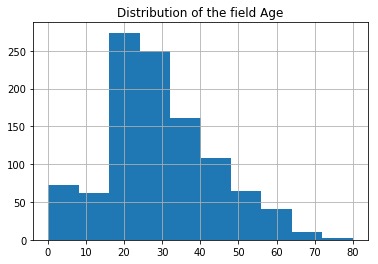

In [748]:
titanic.Age.hist()
plt.title("Distribution of the field Age")

* there are a concentration of the age between 18 and 35 years

Text(0.5, 1.0, 'Distribution of the field Fare')

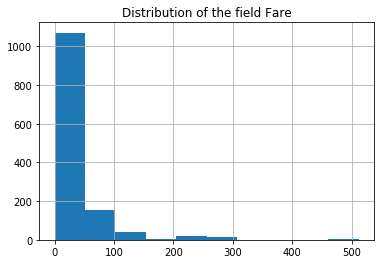

In [749]:
titanic.Fare.hist()
plt.title("Distribution of the field Fare")

* there are a concentration of the Fare between 0 and 50

 Com base no valores da feature Age e Cabin, vamos começar por elas o preenchimento dos "Missing Values"

## Title

In [750]:
titanic['Title']=[i.split(",")[1].split(".")[0].strip() for i in titanic["Name"]]

In [751]:
titanic.groupby('Embarked').Title.count()

Embarked
C    270
Q    123
S    914
Name: Title, dtype: int64

Text(0.5, 1.0, 'Quantidade de passageiros por Title')

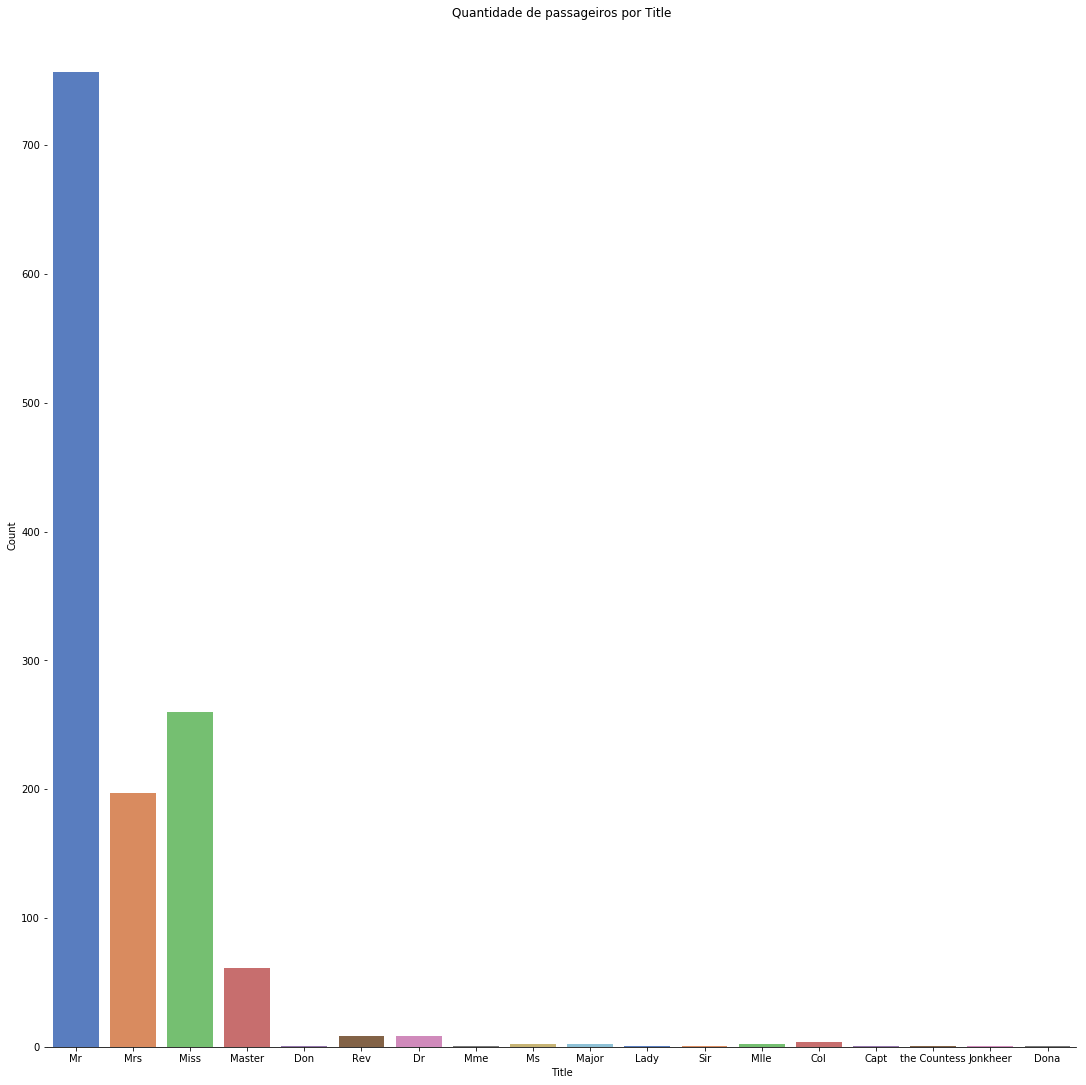

In [752]:
g = sns.factorplot("Title",
                   data=titanic,
                   size=15, 
                   kind="count", 
                   palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")
plt.title('Quantidade de passageiros por Title')

* Há uma padrão em Mr, Mrs, Miss e Master
* Vamos agrupar os outros que possuem poucos passageiros

In [753]:
titanic["Title"] = titanic["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic["Title"] = titanic["Title"].replace(['Mme','Mlle','Ms'], 'Miss')

Text(0.5, 1.0, 'Quantidade de passageiros por Title')

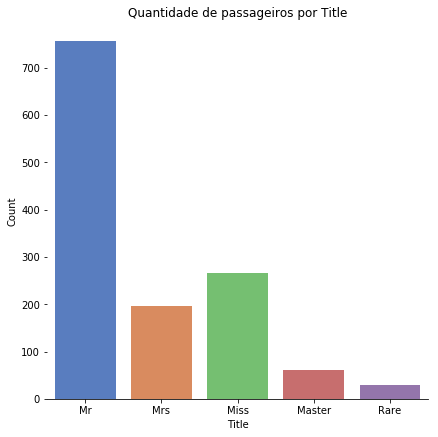

In [754]:
g = sns.factorplot("Title",
                   data=titanic,
                   size=6, 
                   kind="count", 
                   palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")
plt.title('Quantidade de passageiros por Title')

In [755]:
titanic.groupby('Title').Title.count()

Title
Master     61
Miss      265
Mr        757
Mrs       197
Rare       29
Name: Title, dtype: int64

* Master - Homens Jovens
* Miss - é usado antes de sobrenomes ou nomes completos de mulheres que não são casadas. É algo próximo a “senhorita”, em português.

* Mr - Se utiliza antes de sobrenomes ou nomes completos de homens em geral, independente do seu estado civil.
* Mrs- é usado antes de sobrenomes ou nomes completos de mulheres casadas.
* Ms- é usado antes de sobrenomes ou nomes completos de mulheres em geral,independente do seu estado civil




## Acompanhado

In [756]:
titanic['Ft_Acompanhado'] = titanic['SibSp'] + titanic['Parch']

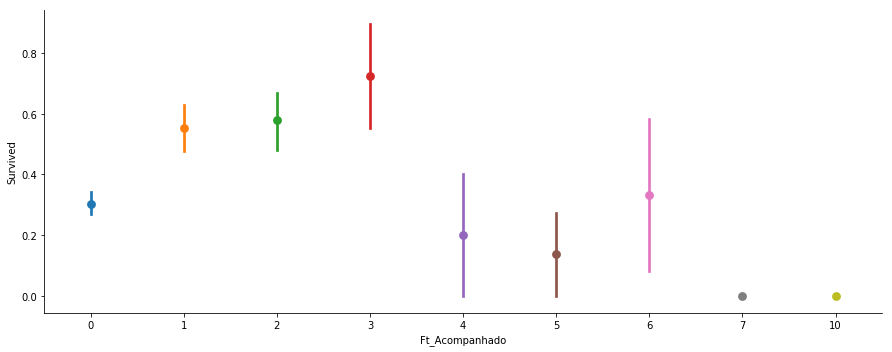

In [757]:
axes = sns.factorplot('Ft_Acompanhado','Survived',hue='Ft_Acompanhado' ,
                      data=titanic, aspect = 2.5, )

## Embarked

In [758]:
mode =  titanic.Embarked.mode()
titanic.loc[titanic.Embarked.isna(),'Embarked'] = 'S'


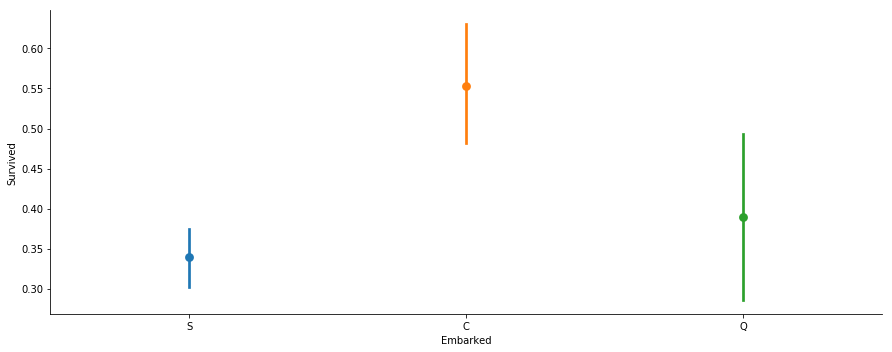

In [759]:
axes = sns.factorplot('Embarked','Survived',hue='Embarked', 
                      data=titanic, aspect = 2.5, )

## Input Age

In [760]:
df_media= titanic.groupby(['Ft_Acompanhado','Embarked','Title','Pclass']).Age.median().reset_index()

In [761]:
df_merge= pd.merge(titanic,df_media, on=['Ft_Acompanhado','Embarked','Title','Pclass']).reset_index()   

In [762]:
df_merge.loc[df_merge.Age_x.isna()==True,'Age_x'] = df_merge.loc[df_merge.Age_x.isna()==True,'Age_y']
del df_merge['Age_y']

In [763]:
df_merge =df_merge.rename(columns={'Age_x':'Age'})

In [764]:
titanic=df_merge

In [765]:
df_media2 = titanic.groupby(['Pclass','Title']).Age.mean().reset_index()


In [766]:
df_merge2= pd.merge(titanic,df_media2, on=['Pclass','Title']).reset_index()   


In [767]:
df_merge2.loc[df_merge2.Age_x.isna()==True,'Age_x'] = df_merge2.loc[df_merge2.Age_x.isna()==True,'Age_y']



In [768]:
df_merge2 =df_merge2.rename(columns={'Age_x':'Age'})


In [769]:
titanic=df_merge2

In [770]:
del titanic['level_0']
del titanic['index']
del titanic['Age_y']


In [771]:
print('Missig Values:')
titanic.isnull().sum()

Missig Values:


Age                  0
Cabin             1014
Embarked             0
Fare                 1
Name                 0
Parch                0
PassengerId          0
Pclass               0
Sex                  0
SibSp                0
Survived           418
Ticket               0
Title                0
Ft_Acompanhado       0
dtype: int64

In [772]:
titanic=titanic.sort_values('PassengerId').reset_index()

In [773]:
print(titanic[0:891].Survived.isna().sum())
print(titanic[891:1309].Survived.isna().sum())

0
418


In [774]:
titanic.loc[titanic.Age < 1 ,'Age'] = 1

Text(0.5, 1.0, 'Distribution of the field Age')

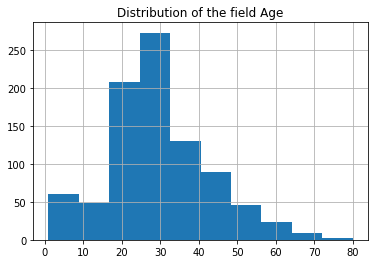

In [775]:
titanic[titanic.Survived.isna()==False].Age.hist()
plt.title("Distribution of the field Age")

In [776]:
titanic['Survived_Lbl']=titanic.Survived.map({0:'M',1:'V'})

In [777]:
df_age= titanic.groupby(['Age']).agg({'Survived_Lbl':'count','Survived':'sum'}).reset_index()
df_age = df_age.rename(columns={'Age':'Age','Survived_Lbl':'Qtd_total','Survived':'Qtd_Sobreviventes'})

In [778]:
df_age = df_age.sort_values('Qtd_total',ascending=False)

In [779]:

df_age['Prob'] = df_age.Qtd_Sobreviventes/df_age.Qtd_total

Qtd_total= df_age.Qtd_total.sum().astype(int)
print(Qtd_total)
df_age['Prob_Sobreviver'] = df_age.Qtd_Sobreviventes/Qtd_total


Qtd_total_Sobreviventes= df_age.Qtd_Sobreviventes.sum().astype(int)
print(Qtd_total_Sobreviventes)
df_age['Prob_Sobreviver_sobre_sobrevividos'] = df_age.Qtd_Sobreviventes/Qtd_total_Sobreviventes





891
342


In [780]:
df_age['Prob_não_Sobreviver'] = 1-df_age.Prob_Sobreviver
df_age['Prob_não_Sobreviver_sobre_sobrevivesntes'] = 1-df_age.Prob_Sobreviver_sobre_sobrevividos


In [781]:
df_age = df_age.sort_values('Prob',ascending=False)

In [782]:
df_age.sort_values('Prob_Sobreviver',ascending=False)

,Age,Qtd_total,Qtd_Sobreviventes,Prob,Prob_Sobreviver,Prob_Sobreviver_sobre_sobrevividos,Prob_não_Sobreviver,Prob_não_Sobreviver_sobre_sobrevivesntes
30,22.000000,46,25.0,0.543478,0.028058,0.073099,0.971942,0.926901
54,35.000000,23,16.0,0.695652,0.017957,0.046784,0.982043,0.953216
34,24.000000,30,15.0,0.500000,0.016835,0.043860,0.983165,0.956140
55,36.000000,27,12.0,0.444444,0.013468,0.035088,0.986532,0.964912
0,1.000000,15,12.0,0.800000,0.013468,0.035088,0.986532,0.964912
40,27.000000,18,11.0,0.611111,0.012346,0.032164,0.987654,0.967836
45,30.000000,27,11.0,0.407407,0.012346,0.032164,0.987654,0.967836
44,29.000000,42,10.0,0.238095,0.011223,0.029240,0.988777,0.970760
26,19.000000,27,10.0,0.370370,0.011223,0.029240,0.988777,0.970760
38,26.000000,60,10.0,0.166667,0.011223,0.029240,0.988777,0.970760


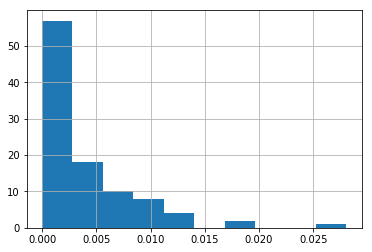

In [783]:
df_age.Prob_Sobreviver.hist()

## Input Fare

In [784]:
titanic.loc[titanic.Fare.isna(),'Fare']=titanic.Fare.mean()

In [785]:
titanic.isna().sum()

index                0
Age                  0
Cabin             1014
Embarked             0
Fare                 0
Name                 0
Parch                0
PassengerId          0
Pclass               0
Sex                  0
SibSp                0
Survived           418
Ticket               0
Title                0
Ft_Acompanhado       0
Survived_Lbl       418
dtype: int64

In [786]:
titanic.loc[titanic.Fare < 1.000 ,'Fare'] = 1.000

In [787]:
titanic.Fare.describe()

count    1309.000000
mean       33.308466
std        51.730638
min         1.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

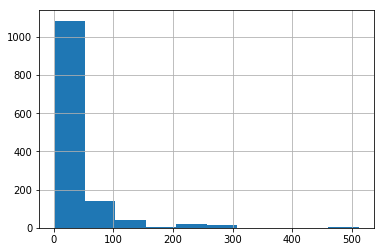

In [788]:
titanic.Fare.hist()

In [789]:
df_fare= titanic.groupby(['Fare']).agg({'Survived_Lbl':'count','Survived':'sum'}).reset_index()
df_fare = df_fare.rename(columns={'Fare':'Fare','Survived_Lbl':'Qtd_total','Survived':'Qtd_Sobreviventes'})

In [790]:
df_fare = df_fare.sort_values('Qtd_total',ascending=False)


In [791]:
df_fare['Prob'] = df_fare.Qtd_Sobreviventes/df_fare.Qtd_total


Qtd_total= df_fare.Qtd_total.sum().astype(int)
print(Qtd_total)
df_fare['Prob_Sobreviver'] = df_fare.Qtd_Sobreviventes/Qtd_total


Qtd_total_Sobreviventes= df_fare.Qtd_Sobreviventes.sum().astype(int)
print(Qtd_total_Sobreviventes)
df_fare['Prob_Sobreviver_sobre_sobrevividos'] = df_fare.Qtd_Sobreviventes/Qtd_total_Sobreviventes


891
342


In [792]:
df_fare['Prob_não_Sobreviver'] = 1-df_fare.Prob_Sobreviver
df_fare['Prob_não_Sobreviver_sobre_sobrevivesntes'] = 1-df_fare.Prob_Sobreviver_sobre_sobrevividos


In [793]:
df_fare =df_fare.sort_values('Prob',ascending=False)

In [794]:
df_fare[df_fare.Qtd_total>5].sort_values(['Qtd_total'],ascending=False)

,Fare,Qtd_total,Qtd_Sobreviventes,Prob,Prob_Sobreviver,Prob_Sobreviver_sobre_sobrevividos,Prob_não_Sobreviver,Prob_não_Sobreviver_sobre_sobrevivesntes
52,8.0500,43,5.0,0.116279,0.005612,0.014620,0.994388,0.985380
100,13.0000,42,16.0,0.380952,0.017957,0.046784,0.982043,0.953216
49,7.8958,38,1.0,0.026316,0.001122,0.002924,0.998878,0.997076
36,7.7500,34,12.0,0.352941,0.013468,0.035088,0.986532,0.964912
159,26.0000,31,15.0,0.483871,0.016835,0.043860,0.983165,0.956140
84,10.5000,24,9.0,0.375000,0.010101,0.026316,0.989899,0.973684
50,7.9250,18,8.0,0.444444,0.008979,0.023392,0.991021,0.976608
37,7.7750,16,3.0,0.187500,0.003367,0.008772,0.996633,0.991228
19,7.2292,15,4.0,0.266667,0.004489,0.011696,0.995511,0.988304
164,26.5500,15,8.0,0.533333,0.008979,0.023392,0.991021,0.976608


## Input Cabin

 Vamos tentar combinar informações de Ticket e Fare para tentar determinar a Cabin

In [795]:
titanic['Ft_Cabin'] = titanic['Ticket'].str.strip()

In [796]:
titanic.Ft_Cabin.str.extract('([a-zA-Z]+)', expand=False).unique()

array(['A', 'PC', 'STON', nan, 'PP', 'C', 'SC', 'S', 'CA', 'SO', 'W',
       'SOTON', 'Fa', 'LINE', 'F', 'SW', 'SCO', 'P', 'WE', 'AQ', 'LP'],
      dtype=object)

In [797]:
titanic['Ft_Cabin'] = titanic.Ft_Cabin.str.extract('([a-zA-Z])', expand=False)

In [798]:
titanic.Ft_Cabin[titanic.Ft_Cabin.isna()] = 'Uknow'

In [799]:
titanic.groupby('Ft_Cabin').Ft_Cabin.count()

Ft_Cabin
A         42
C         77
F         13
L          5
P         98
S         98
Uknow    957
W         19
Name: Ft_Cabin, dtype: int64

In [800]:
titanic.isna().sum()

index                0
Age                  0
Cabin             1014
Embarked             0
Fare                 0
Name                 0
Parch                0
PassengerId          0
Pclass               0
Sex                  0
SibSp                0
Survived           418
Ticket               0
Title                0
Ft_Acompanhado       0
Survived_Lbl       418
Ft_Cabin             0
dtype: int64

In [801]:
titanic.Ft_Cabin[titanic.Ft_Cabin =='NI'] = titanic.Cabin[titanic.Ft_Cabin =='NI'].str.extract('([a-zA-Z])', expand=False)

In [802]:
titanic.Ft_Cabin[titanic.Ft_Cabin.isna()] = 'NI'

In [803]:
titanic["Ft_Cabin"] = titanic["Ft_Cabin"].replace(['L','T','W'], 'G')


In [804]:
titanic.loc[titanic.Cabin.isna(),'Cabin'] = 'NI'

In [805]:
titanic.loc[titanic.Ft_Cabin.isna(),'Ft_Cabin'] = 'NI'


In [806]:
titanic.groupby('Ft_Cabin').Survived.count()


Ft_Cabin
A         29
C         47
F          7
G         17
P         65
S         65
Uknow    661
Name: Survived, dtype: int64

# Continuando analise exploratória 

Text(0.5, 1.0, 'Boxplot - Age x sex')

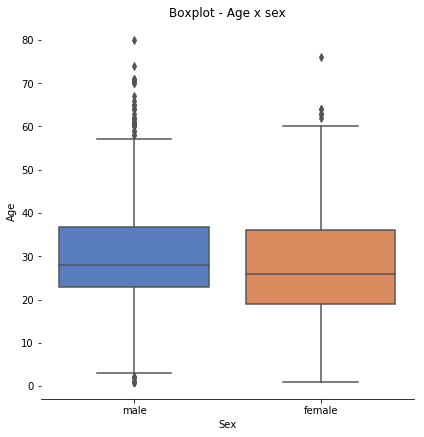

In [807]:
g = sns.factorplot(x="Sex",y="Age",data=titanic,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x sex')

Text(0.5, 1.0, 'Boxplot - Fare x sex')

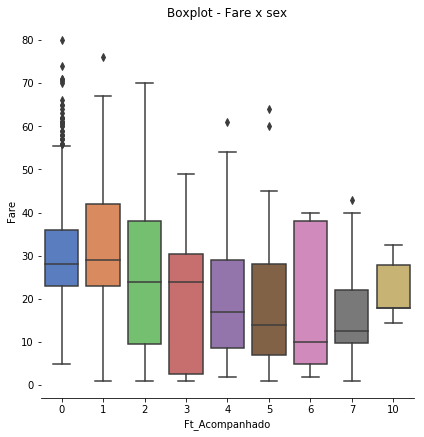

In [808]:
g = sns.factorplot(x="Ft_Acompanhado",y="Age",data=titanic,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Fare")
plt.title('Boxplot - Fare x sex')

Text(0.5, 1.0, 'Boxplot - Age x Pclass')

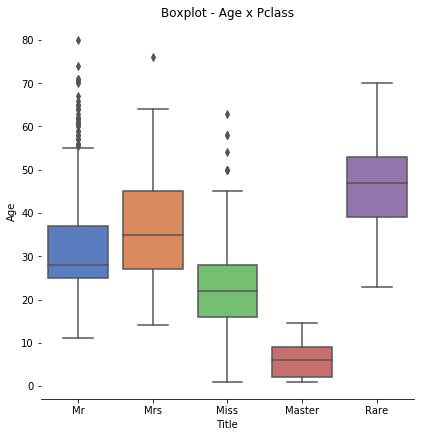

In [809]:
g = sns.factorplot(x="Title",y="Age",data=titanic,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x Pclass')

Text(0.5, 1.0, 'Boxplot - Fare x Pclass')

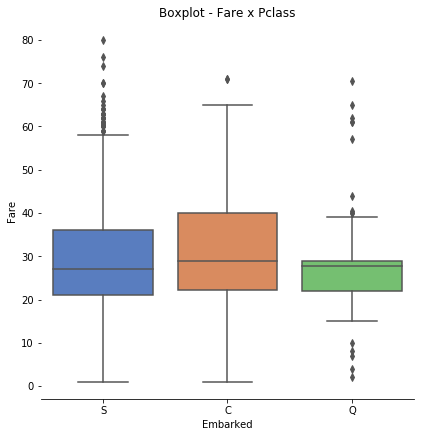

In [810]:
g = sns.factorplot(x="Embarked",y="Age",data=titanic,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Fare")
plt.title('Boxplot - Fare x Pclass')

Text(0.5, 1.0, 'Boxplot - Age x Embarked')

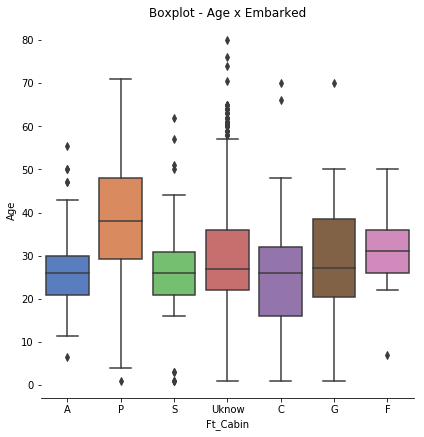

In [811]:
g = sns.factorplot(x="Ft_Cabin",y="Age",data=titanic,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x Embarked')

Text(0.5, 1.0, 'Boxplot - Age x Title')

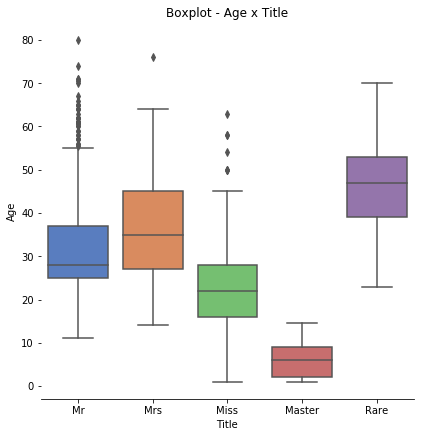

In [812]:
g = sns.factorplot(x="Title",y="Age",data=titanic,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x Title')

# Feature Engineer


## Sibsp


sibsp : O conjunto de dados define relações familiares desta forma  
Irmão = irmã, irmão, meio-irmão, irmã adotiva  
Esposa = marido, esposa (amantes e noivas foram ignorados)  

## Parch
parch : O conjunto de dados define as relações familiares desta forma   
Pai = mãe, pai  
Criança = filha, filho, enteada, enteado  
Algumas crianças viajavam apenas com uma babá, portanto parch = 0 para elas.

In [813]:
titanic['Ft_Alone']=0
titanic.loc[(titanic.SibSp==0)&(titanic.Parch==0), 'Ft_Alone']=1

## Nomrmalização Age e Fare Min/Max

In [814]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# fit and transform in one step
titanic['Norm_Age'] = scaler.fit_transform(titanic[['Age']])
titanic['Norm_Fare'] = scaler.fit_transform(titanic[['Fare']])


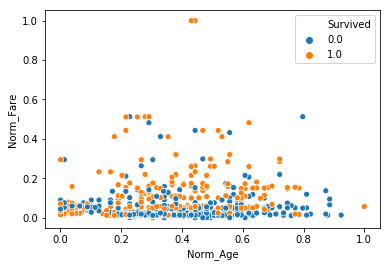

In [815]:
ax = sns.scatterplot(x="Norm_Age", y="Norm_Fare", hue='Survived', data=titanic)

# Label Enconding

In [816]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 20 columns):
index             1309 non-null int64
Age               1309 non-null float64
Cabin             1309 non-null object
Embarked          1309 non-null object
Fare              1309 non-null float64
Name              1309 non-null object
Parch             1309 non-null int64
PassengerId       1309 non-null int64
Pclass            1309 non-null int64
Sex               1309 non-null object
SibSp             1309 non-null int64
Survived          891 non-null float64
Ticket            1309 non-null object
Title             1309 non-null object
Ft_Acompanhado    1309 non-null int64
Survived_Lbl      891 non-null object
Ft_Cabin          1309 non-null object
Ft_Alone          1309 non-null int64
Norm_Age          1309 non-null float64
Norm_Fare         1309 non-null float64
dtypes: float64(5), int64(7), object(8)
memory usage: 163.7+ KB


In [817]:
titanic.Sex=titanic.Sex.map({'male':1,'female':0})
titanic.Sex =titanic.Sex.astype(int)

In [819]:

label_encoder  = LabelEncoder()
label_encoder  = label_encoder.fit(titanic.Ft_Cabin)
titanic['OneHt_Ft_Cabin'] = label_encoder.transform(titanic.Ft_Cabin)

label_encoder  = LabelEncoder()
label_encoder  = label_encoder.fit(titanic.Title)
titanic['OneHt_Ft_Title'] = label_encoder.transform(titanic.Title)


label_encoder  = LabelEncoder()
label_encoder  = label_encoder.fit(titanic.Embarked)
titanic['OneHt_Embarked'] = label_encoder.transform(titanic.Embarked)


label_encoder  = LabelEncoder()
label_encoder  = label_encoder.fit(titanic.Ft_Alone)
titanic['OneHt_Ft_Alone'] = label_encoder.transform(titanic.Ft_Alone)

label_encoder  = LabelEncoder()
label_encoder  = label_encoder.fit(titanic.Ft_Acompanhado)
titanic['OneHt_Ft_Acompanhado'] = label_encoder.transform(titanic.Ft_Acompanhado)

In [820]:
feture=titanic[['Survived','Pclass','Sex',
'OneHt_Ft_Cabin',
'OneHt_Ft_Title',
'OneHt_Embarked',
'OneHt_Ft_Alone'
               ]]

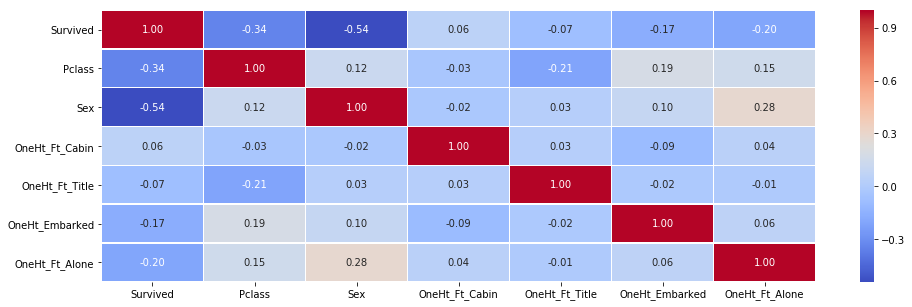

In [821]:
plt.figure(figsize = (16,5))

g = sns.heatmap(feture.corr(),annot=True, fmt = ".2f", cmap = "coolwarm", linewidths=.5)


## Binarização

In [822]:
#titanic = pd.get_dummies(titanic, columns = ["OneHt_Ft_Pclass"] , prefix="BIN_Pclass")
#titanic = pd.get_dummies(titanic, columns = ["OneHt_Ft_Sex"]    , prefix="BIN_Sex")      
#titanic = pd.get_dummies(titanic, columns = ["OneHt_Ft_Prioridade"], prefix="BIN_Prioridade")

titanic = pd.get_dummies(titanic, columns = ["OneHt_Ft_Cabin"]       , prefix="BIN_Ft_Cabin"  ,drop_first=True)
titanic = pd.get_dummies(titanic, columns = ["OneHt_Ft_Title"]       , prefix="BIN_Ft_Title"   ,drop_first=True)
titanic = pd.get_dummies(titanic, columns = ["OneHt_Embarked"]       , prefix="BIN_Embarked"   ,drop_first=True)
titanic = pd.get_dummies(titanic, columns = ["OneHt_Fx_Age"]         , prefix="BIN_Fx_Age"     ,drop_first=True)
titanic = pd.get_dummies(titanic, columns = ["OneHt_Fx_Fare"]        , prefix="BIN_Fx_Fare"     ,drop_first=True)
titanic = pd.get_dummies(titanic, columns = ["OneHt_Ft_Alone"]       , prefix="BIN_Ft_Alone")
titanic = pd.get_dummies(titanic, columns = ["OneHt_Ft_Prioridade"]  , prefix="BIN_Ft_Prioridade",drop_first=True   )



KeyError: "None of [Index(['OneHt_Ft_Familia'], dtype='object')] are in the [columns]"

# Construindo Modelo



In [837]:
print(titanic[0:891].Survived.isna().sum())
print(titanic[891:1309].Survived.isna().sum())

0
418


In [838]:
train=titanic[0:891]
test= titanic[891:1309]
IDtest = test_csv['PassengerId']
train.Survived= train.Survived.astype(int)


In [ ]:
titanic.groupby('Survived').Survived.count()

In [839]:
train.groupby('Survived').Survived.count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [840]:
 train = train.drop(labels =['index','PassengerId','Name','Title',
                            'Ticket','SibSp','Parch','Cabin','Embarked',
                            'Survived_Lbl',
                            #'Age','Fare',
                            'Norm_Age','Norm_Fare', 
                            'Ft_Cabin',
                            'Ft_Alone'
                            ],
                    axis = 1)

In [841]:
 test = test.drop(labels =[ 'index','PassengerId','Name','Title',
                            'Ticket','SibSp','Parch','Cabin','Embarked',
                            'Survived_Lbl',
                            #'Age','Fare',
                            'Norm_Age','Norm_Fare', 
                            'Ft_Cabin',
                            'Ft_Alone'
                            ],
                    axis = 1)

In [842]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Age               891 non-null float64
Fare              891 non-null float64
Pclass            891 non-null int64
Sex               891 non-null int32
Survived          891 non-null int32
Ft_Acompanhado    891 non-null int32
OneHt_Ft_Cabin    891 non-null int32
OneHt_Ft_Title    891 non-null int32
OneHt_Embarked    891 non-null int32
OneHt_Ft_Alone    891 non-null int32
dtypes: float64(2), int32(7), int64(1)
memory usage: 45.3 KB


In [843]:
train.head()

,Age,Fare,Pclass,Sex,Survived,Ft_Acompanhado,OneHt_Ft_Cabin,OneHt_Ft_Title,OneHt_Embarked,OneHt_Ft_Alone
0,22.0,7.2500,3,1,0,1,0,2,2,0
1,38.0,71.2833,1,0,1,1,4,3,0,0
2,26.0,7.9250,3,0,1,0,5,1,2,1
3,35.0,53.1000,1,0,1,1,6,3,2,0
4,35.0,8.0500,3,1,0,0,6,2,2,1


In [844]:
from sklearn.model_selection import train_test_split

y_train = np.array(train["Survived"])
X_train = np.array(train.drop(labels = ["Survived"],axis = 1))

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

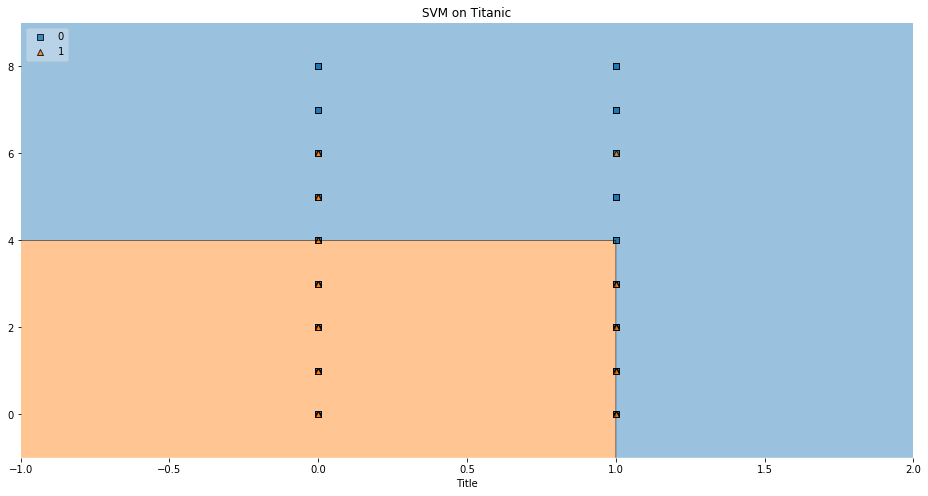

In [868]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(16,8))
# Loading some example data
train["Survived"] =train["Survived"].astype(int)
X = np.array(train[['Sex','Ft_Acompanhado']])
y = np.array(train["Survived"])

# Training a classifier
#svm =SVC(C=0.5, kernel='linear')
svm= SVC(decision_function_shape = 'ovo')
svm.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('Title')
plt.title('SVM on Titanic')

plt.show()

<Figure size 1152x576 with 0 Axes>

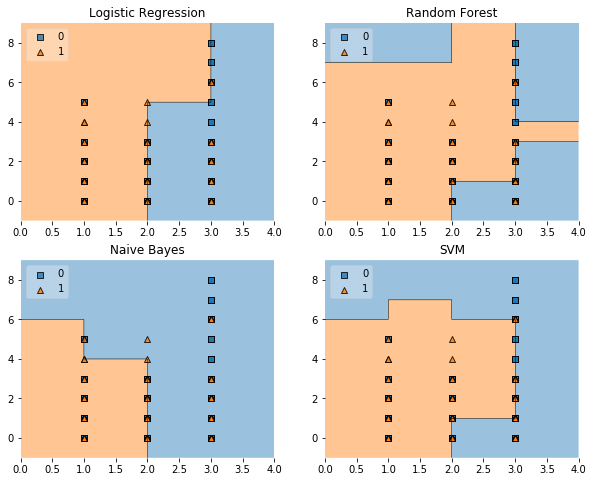

In [862]:
# Loading Plotting Utilities
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC




plt.figure(figsize=(16,8))

# Initializing Classifiers
clf1 = LogisticRegression(random_state=2, solver='lbfgs')
clf2 = RandomForestClassifier(n_estimators=100, 
                              random_state=1)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [ ]:
# Modeling step Test differents algorithms 
kfold = StratifiedKFold(n_splits=3)
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_


In [ ]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

In [ ]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [37],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

In [ ]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

In [ ]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

In [ ]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

gsadaDTC.best_score_

In [ ]:
neighbors = np.arange(1, 9)
weight_options = ["uniform", "distance"]

knn = KNeighborsClassifier()

param_grid = dict(n_neighbors = neighbors, weights = weight_options)

gsKNN = GridSearchCV(knn, cv=kfold, param_grid = param_grid, scoring="accuracy", n_jobs= 4, verbose = 1)

gsKNN.fit(X_train,y_train)
    
Knn_best = gsKNN.best_estimator_

gsKNN.best_score_

In [ ]:
param_grid={"C":np.logspace(-3,3,7), 
            "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg= LogisticRegression()

gslogreg = GridSearchCV(logreg, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

gslogreg.fit(X_train, y_train)

lgreg_best =  gslogreg.best_estimator_

gslogreg.best_score_

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure(figsize = (8,3))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
g = plot_learning_curve(gsadaDTC.best_estimator_,"DecisionTreeClassifier",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsKNN.best_estimator_,"KNN",X_train,y_train,cv=kfold)
g = plot_learning_curve(gslogreg.best_estimator_,"LogisticRegression",X_train,y_train,cv=kfold)

# Feature Selection Baseado em Algoritmos de Árvore

In [ ]:
X_feature_select= train.drop(labels = ["Survived"],axis = 1)

In [ ]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),
                     ("ExtraTrees",ExtC_best),
                     ("RandomForest",RFC_best),
                     ("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_feature_select.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1


# Predict

In [ ]:
#y = np.array(train[["Survived"]])
#X = np.array(train.drop(labels = ["Survived"],axis = 1))
y_test = np.array(test[["Survived"]])
X_test = np.array(test.drop(labels = ["Survived"],axis = 1))


In [ ]:
votingC = VotingClassifier(estimators=[('rfc',    RFC_best), 
                                       ('extc',   ExtC_best),
                                       ('svc',    SVMC_best) ,
                                       ('adac',   ada_best),
                                       ('gbc',    GBC_best),
                                       ('logreg', lgreg_best)
                                       ], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, y_train)


In [ ]:
X_test = np.array(test[['Fare','Age']])


In [ ]:
clf4

In [ ]:
#test_Survived = pd.Series(votingC.predict(X_test), name="Survived")

test_Survived = pd.Series(clf4.predict(X_test) , name="Survived")

results = pd.concat([IDtest,test_Survived],axis=1,ignore_index=False)

results.to_csv("ensemble_python_voting.csv",index=False)

In [ ]:
results.Survived.unique()